In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kruskal

In [115]:
all_data = pd.read_csv('./31959249-自适应难度分析-编辑框3-查询20.csv', encoding = 'gb18030')
all_data.head()

,exercise_id,test_type,exercise_type,labels,difficulty,ac_exe_yn,correct_cnt,ttl_cnt,correct_rate
0,25571,进阶测试,其他,0,30,0,210,246,0.85
1,25975,进阶测试,文本单选,0,20,0,412,520,0.79
2,25525,进阶测试,文本单选,0,30,0,224,246,0.91
3,22912,进阶测试,其他,0,30,0,241,334,0.72
4,25962,进阶测试,文本单选,0,20,0,463,523,0.89


定级测试 & 进阶测试

In [124]:
data = all_data
data.groupby(['test_type', 'ac_exe_yn']).sum()

exercise_id  labels  difficulty  correct_cnt  ttl_cnt  \
test_type ac_exe_yn                                                          
定级测试      0             21040357    1406        7540      2258962  4120013   
          1              5620430      88        1680       428551   979881   
进阶测试      0             16728420       0        5310        87808   113830   
          1              4269873       0        2010        19046    26008   

                     correct_rate  
test_type ac_exe_yn                
定级测试      0                189.15  
          1                 33.59  
进阶测试      0                188.58  
          1                 37.61

In [123]:
data.groupby(['test_type', 'ac_exe_yn', 'exercise_type']).count()

exercise_id  labels  difficulty  \
test_type ac_exe_yn exercise_type                                    
定级测试      0         其他                      94      94          94   
                    文本单选                   249     249         249   
          1         文本单选                    88      88          88   
进阶测试      0         其他                      86      86          86   
                    文本单选                   119     119         119   
                    选词填空                    36      36          36   
          1         口语填空                    15      15          15   
                    口语复述                    10      10          10   
                    文本单选                    26      26          26   

                                   correct_cnt  ttl_cnt  correct_rate  
test_type ac_exe_yn exercise_type                                      
定级测试      0         其他                      94       94            94  
                    文本单选                   249      249           249  
          1         文本单选                    88       88            88  
进阶测试      0         其他                      86       86            86  
                    文本单选                   119      119           119  
                    选词填空                    36       36            36  
          1         口语填空                    15       15            15  
                    口语复述                    10       10            10  
                    文本单选                    26       26            26

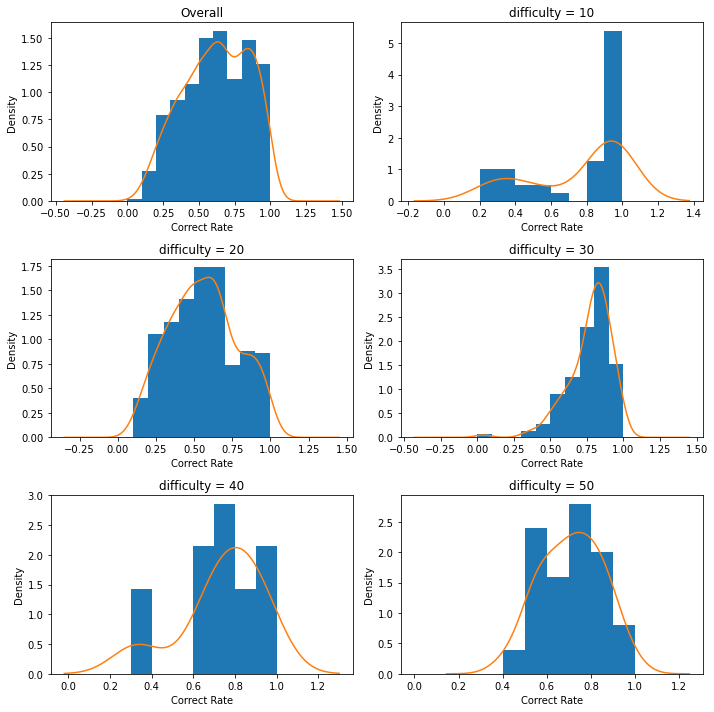

In [79]:
plt.figure(figsize=(10,10))

plt.subplot(321)
data.correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data.correct_rate.plot(kind='kde')
plt.title('Overall')
plt.xlabel('Correct Rate')

plt.subplot(322)
data[data.difficulty == 10].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 10].correct_rate.plot(kind='kde')
plt.title('difficulty = 10')
plt.xlabel('Correct Rate')

plt.subplot(323)
data[data.difficulty == 20].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 20].correct_rate.plot(kind='kde')
plt.title('difficulty = 20')
plt.xlabel('Correct Rate')

plt.subplot(324)
data[data.difficulty == 30].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 30].correct_rate.plot(kind='kde')
plt.title('difficulty = 30')
plt.xlabel('Correct Rate')

plt.subplot(325)
data[data.difficulty == 40].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 40].correct_rate.plot(kind='kde')
plt.title('difficulty = 40')
plt.xlabel('Correct Rate')

plt.subplot(326)
data[data.difficulty == 50].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 50].correct_rate.plot(kind='kde')
plt.title('difficulty = 50')
plt.xlabel('Correct Rate')

plt.tight_layout()
# fig.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)

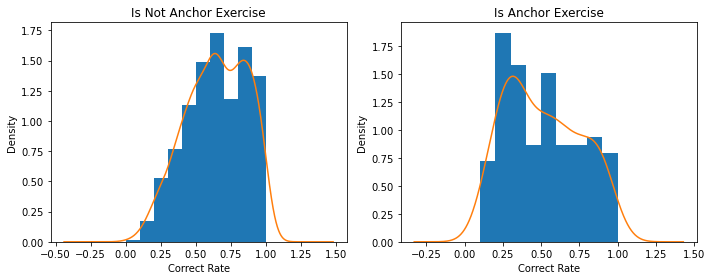

In [95]:
plt.figure(figsize=(10,4))

plt.subplot(121)
data[data.ac_exe_yn == 0].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.ac_exe_yn == 0].correct_rate.plot(kind='kde')
plt.title('Is Not Anchor Exercise')
plt.xlabel('Correct Rate')

plt.subplot(122)
data[data.ac_exe_yn == 1].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.ac_exe_yn == 1].correct_rate.plot(kind='kde')
plt.title('Is Anchor Exercise')
plt.xlabel('Correct Rate')


plt.tight_layout()

进阶测试

In [116]:
data = all_data[all_data.test_type == '进阶测试']

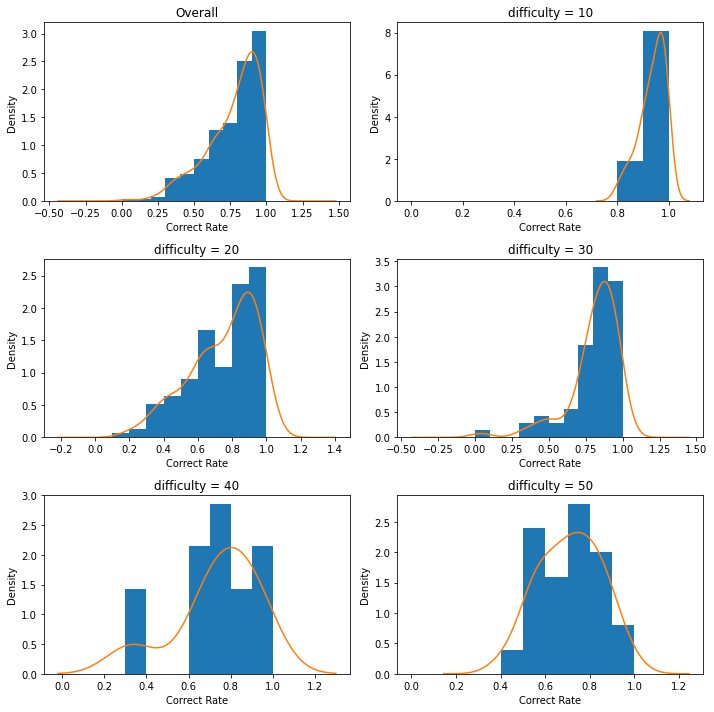

In [112]:
plt.figure(figsize=(10,10))

plt.subplot(321)
data.correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data.correct_rate.plot(kind='kde')
plt.title('Overall')
plt.xlabel('Correct Rate')

plt.subplot(322)
data[data.difficulty == 10].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 10].correct_rate.plot(kind='kde')
plt.title('difficulty = 10')
plt.xlabel('Correct Rate')

plt.subplot(323)
data[data.difficulty == 20].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 20].correct_rate.plot(kind='kde')
plt.title('difficulty = 20')
plt.xlabel('Correct Rate')

plt.subplot(324)
data[data.difficulty == 30].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 30].correct_rate.plot(kind='kde')
plt.title('difficulty = 30')
plt.xlabel('Correct Rate')

plt.subplot(325)
data[data.difficulty == 40].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 40].correct_rate.plot(kind='kde')
plt.title('difficulty = 40')
plt.xlabel('Correct Rate')

plt.subplot(326)
data[data.difficulty == 50].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 50].correct_rate.plot(kind='kde')
plt.title('difficulty = 50')
plt.xlabel('Correct Rate')

plt.tight_layout()
# fig.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)

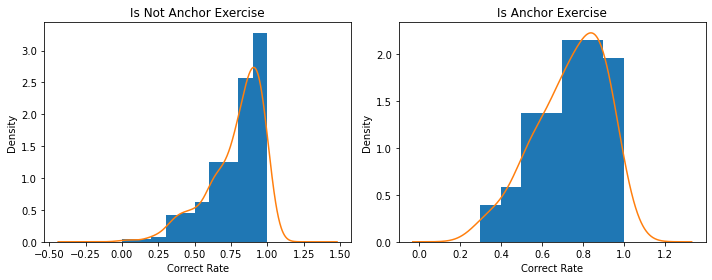

In [117]:
plt.figure(figsize=(10,4))

plt.subplot(121)
data[data.ac_exe_yn == 0].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.ac_exe_yn == 0].correct_rate.plot(kind='kde')
plt.title('Is Not Anchor Exercise')
plt.xlabel('Correct Rate')

plt.subplot(122)
data[data.ac_exe_yn == 1].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.ac_exe_yn == 1].correct_rate.plot(kind='kde')
plt.title('Is Anchor Exercise')
plt.xlabel('Correct Rate')


plt.tight_layout()

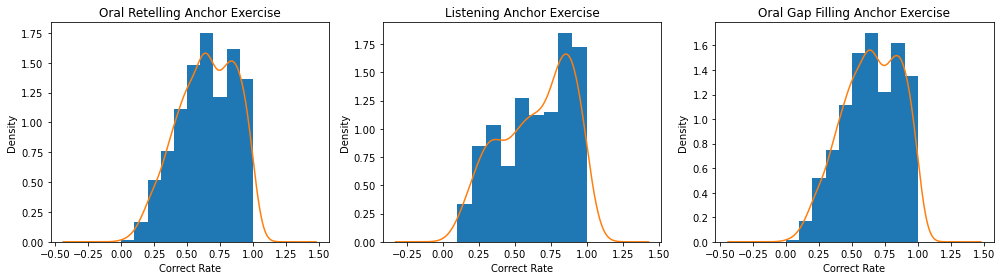

In [125]:
plt.figure(figsize=(14,4))

plt.subplot(131)
data[data.ac_exe_yn == 1 & data.exercise_type.isin(['口语复述'])].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.ac_exe_yn == 1 & data.exercise_type.isin(['口语复述'])].correct_rate.plot(kind='kde')
plt.title('Oral Retelling Anchor Exercise')
plt.xlabel('Correct Rate')



plt.subplot(132)
data[data.ac_exe_yn == 1 & data.exercise_type.isin(['文本单选'])].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.ac_exe_yn == 1 & data.exercise_type.isin(['文本单选'])].correct_rate.plot(kind='kde')
plt.title('Listening Anchor Exercise')
plt.xlabel('Correct Rate')

plt.subplot(133)
data[data.ac_exe_yn == 1 & data.exercise_type.isin(['口语填空'])].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.ac_exe_yn == 1 & data.exercise_type.isin(['口语填空'])].correct_rate.plot(kind='kde')
plt.title('Oral Gap Filling Anchor Exercise')
plt.xlabel('Correct Rate')

plt.tight_layout()

定级测试

In [99]:
data = all_data[all_data.test_type == '定级测试']

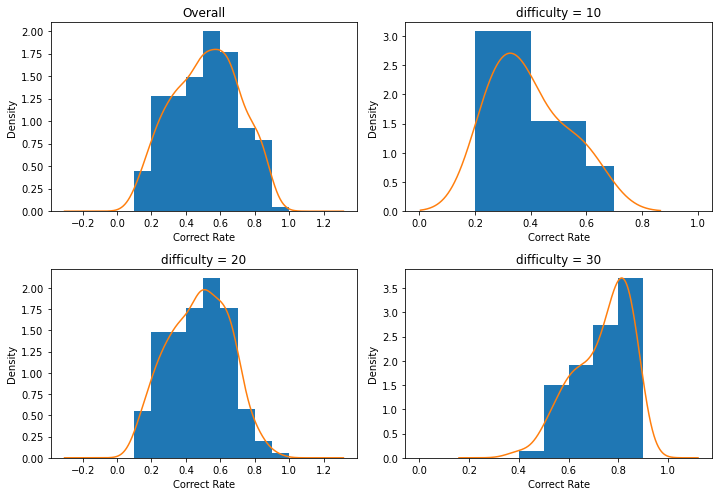

In [101]:
plt.figure(figsize=(10,7))

plt.subplot(221)
data.correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data.correct_rate.plot(kind='kde')
plt.title('Overall')
plt.xlabel('Correct Rate')

plt.subplot(222)
data[data.difficulty == 10].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 10].correct_rate.plot(kind='kde')
plt.title('difficulty = 10')
plt.xlabel('Correct Rate')

plt.subplot(223)
data[data.difficulty == 20].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 20].correct_rate.plot(kind='kde')
plt.title('difficulty = 20')
plt.xlabel('Correct Rate')

plt.subplot(224)
data[data.difficulty == 30].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 30].correct_rate.plot(kind='kde')
plt.title('difficulty = 30')
plt.xlabel('Correct Rate')

plt.tight_layout()
# fig.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)

复习题做题记录

In [96]:
data = pd.read_csv('./31628746-自适应难度分析-复习课做题记录-查询10.csv', encoding = 'gb18030')

In [97]:
data.head()

,exe_type,difficulty,exe_10_yn,correct_rate,exe_num
0,overall,20,1,0.86,3
1,overall,30,1,0.90,2
2,overall,3,1,0.94,1
3,overall,30,1,0.31,1
4,overall,2,1,0.72,1


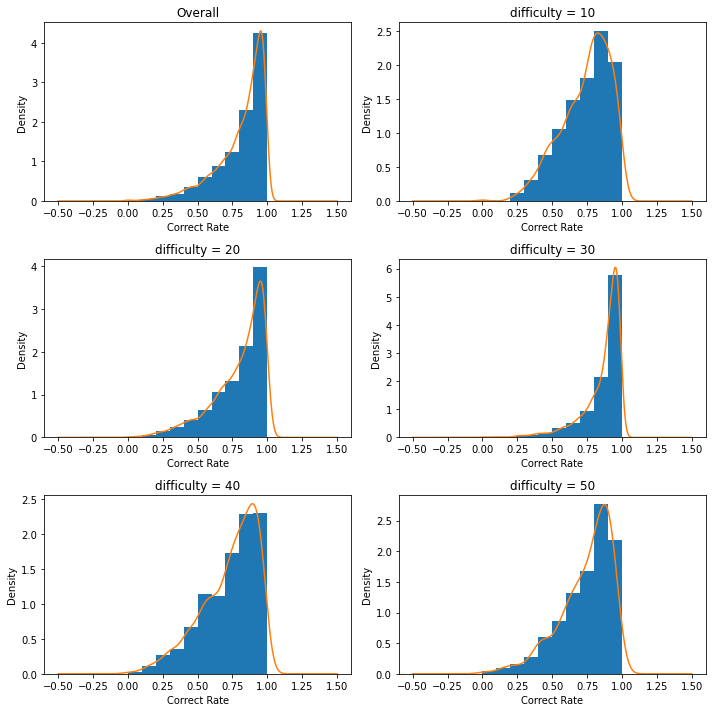

In [98]:
plt.figure(figsize=(10,10))

plt.subplot(321)
data.correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data.correct_rate.plot(kind='kde')
plt.title('Overall')
plt.xlabel('Correct Rate')

plt.subplot(322)
data[data.difficulty == 10].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 10].correct_rate.plot(kind='kde')
plt.title('difficulty = 10')
plt.xlabel('Correct Rate')

plt.subplot(323)
data[data.difficulty == 20].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 20].correct_rate.plot(kind='kde')
plt.title('difficulty = 20')
plt.xlabel('Correct Rate')

plt.subplot(324)
data[data.difficulty == 30].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 30].correct_rate.plot(kind='kde')
plt.title('difficulty = 30')
plt.xlabel('Correct Rate')

plt.subplot(325)
data[data.difficulty == 40].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 40].correct_rate.plot(kind='kde')
plt.title('difficulty = 40')
plt.xlabel('Correct Rate')

plt.subplot(326)
data[data.difficulty == 50].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.difficulty == 50].correct_rate.plot(kind='kde')
plt.title('difficulty = 50')
plt.xlabel('Correct Rate')

plt.tight_layout()

In [114]:
7/(7+228)

0.029787234042553193

# 能力维度

自适应做题记录

In [43]:
data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201201/10/33238645-自适应难度分析-能力维度_复习课-查询1.csv', encoding = 'gb18030')
data.head()

,abilities,exe_10_yn,correct_rate,exe_num
0,0,1,1.00,152
1,0,1,0.98,52
2,0,1,0.59,4
3,0,1,0.83,22
4,0,1,0.79,13


In [44]:
data.groupby(['abilities']).size()

abilities
0     96
1    118
2    114
4     94
dtype: int64

In [39]:
# 正态性检验
stats.normaltest(data['correct_rate'][data['abilities'] == 1])
stats.normaltest(data['correct_rate'][data['abilities'] == 2])
stats.normaltest(data['correct_rate'][data['abilities'] == 4])

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.9205688570811785, pvalue=0.38278399579682343)

In [45]:
# 方差分析
stats.f_oneway(data['correct_rate'][data['abilities'] == 1],
               data['correct_rate'][data['abilities'] == 2],
               data['correct_rate'][data['abilities'] == 4])

F_onewayResult(statistic=2.76661706952145, pvalue=0.0643648790061808)

In [46]:
# Kruskal-Wallis H Test
kruskal(data['correct_rate'][data['abilities'] == 1],
               data['correct_rate'][data['abilities'] == 2],
               data['correct_rate'][data['abilities'] == 4])

KruskalResult(statistic=5.227651674869147, pvalue=0.0732537500308789)

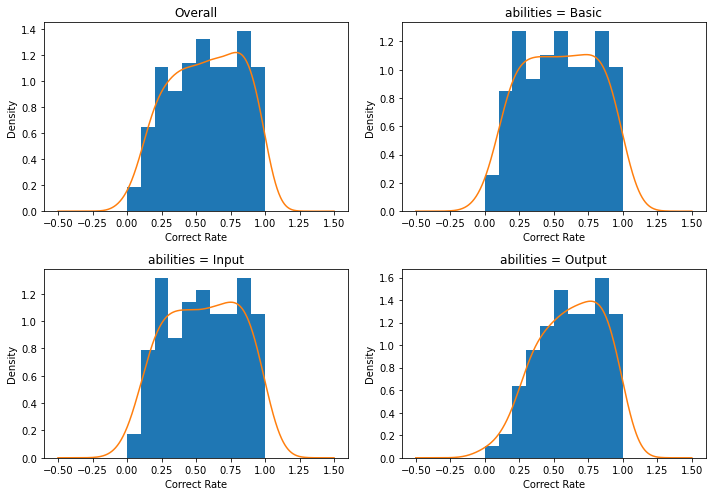

In [18]:
plt.figure(figsize=(10,7))

plt.subplot(221)
data[data.abilities != 0].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities != 0].correct_rate.plot(kind='kde')
plt.title('Overall')
plt.xlabel('Correct Rate')

plt.subplot(222)
data[data.abilities == 1].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities == 1].correct_rate.plot(kind='kde')
plt.title('abilities = Basic')
plt.xlabel('Correct Rate')

plt.subplot(223)
data[data.abilities == 2].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities == 2].correct_rate.plot(kind='kde')
plt.title('abilities = Input')
plt.xlabel('Correct Rate')

plt.subplot(224)
data[data.abilities == 4].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities == 4].correct_rate.plot(kind='kde')
plt.title('abilities = Output')
plt.xlabel('Correct Rate')

plt.tight_layout()

主课做题记录

In [47]:
data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201201/10/33240983-自适应难度分析-能力维度主课-查询1.csv', encoding = 'gb18030')
data.head()

,abilities,exe_10_yn,correct_rate,exe_num
0,2.0,1,0.51,1
1,2.0,1,0.90,27
2,2.0,1,0.81,9
3,2.0,1,0.95,32
4,2.0,1,0.79,3


In [48]:
data.groupby(['abilities']).size()

abilities
0.0     1
1.0    80
2.0    53
4.0    54
dtype: int64

In [34]:
# 方差分析
stats.f_oneway(data['correct_rate'][data['abilities'] == 1],
               data['correct_rate'][data['abilities'] == 2],
               data['correct_rate'][data['abilities'] == 4])

F_onewayResult(statistic=7.4687782477753375, pvalue=0.0007608447029687161)

# Kruskal-Wallis H Test (ANOVA: for more than two independent samples)
The Kruskal-Wallis test is a nonparametric version of the one-way analysis of variance test or ANOVA for short. It is named for the developers of the method, William Kruskal and Wilson Wallis. This test can be used to determine whether more than two independent samples have a different distribution. It can be thought of as the generalization of the Mann-Whitney U test.

When the Kruskal-Wallis H-test leads to significant results, then at least one of the samples is different from the other samples. However, the test does not identify where the difference(s) occur. Moreover, it does not identify how many differences occur. To identify the particular differences between sample pairs, a researcher might use sample contrasts, or post hoc tests, to analyze the specific sample pairs for significant difference(s). The Mann-Whitney U-test is a useful method for performing sample contrasts between individual sample sets.

In [49]:
# Kruskal-Wallis H Test
kruskal(data['correct_rate'][data['abilities'] == 1],
               data['correct_rate'][data['abilities'] == 2],
               data['correct_rate'][data['abilities'] == 4])

KruskalResult(statistic=12.138873995066994, pvalue=0.002312474773177304)

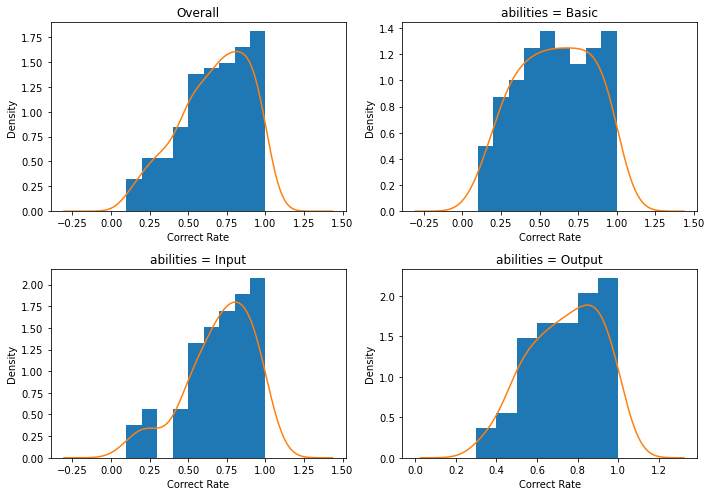

In [21]:
plt.figure(figsize=(10,7))

plt.subplot(221)
data[data.abilities != 0].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities != 0].correct_rate.plot(kind='kde')
plt.title('Overall')
plt.xlabel('Correct Rate')

plt.subplot(222)
data[data.abilities == 1].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities == 1].correct_rate.plot(kind='kde')
plt.title('abilities = Basic')
plt.xlabel('Correct Rate')

plt.subplot(223)
data[data.abilities == 2].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities == 2].correct_rate.plot(kind='kde')
plt.title('abilities = Input')
plt.xlabel('Correct Rate')

plt.subplot(224)
data[data.abilities == 4].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities == 4].correct_rate.plot(kind='kde')
plt.title('abilities = Output')
plt.xlabel('Correct Rate')

plt.tight_layout()

进阶测试做题记录

In [50]:
data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201201/11/33241564-自适应难度分析-能力维度_进阶测试-查询1.csv', encoding = 'gb18030')
data.head()

,abilities,exe_10_yn,correct_rate,exe_num
0,1,1,0.89,4
1,1,1,0.91,8
2,1,0,1.00,3
3,1,1,0.69,2
4,1,1,0.68,3


In [51]:
data.groupby(['abilities']).size()

abilities
1    60
2    14
4    30
dtype: int64

In [37]:
# 方差分析
stats.f_oneway(data['correct_rate'][data['abilities'] == 1],
               data['correct_rate'][data['abilities'] == 2],
               data['correct_rate'][data['abilities'] == 4])

F_onewayResult(statistic=3.842822091648068, pvalue=0.024633952201148987)

In [52]:
# Kruskal-Wallis H Test
kruskal(data['correct_rate'][data['abilities'] == 1],
               data['correct_rate'][data['abilities'] == 2],
               data['correct_rate'][data['abilities'] == 4])

KruskalResult(statistic=6.169277744448362, pvalue=0.04574655126790937)

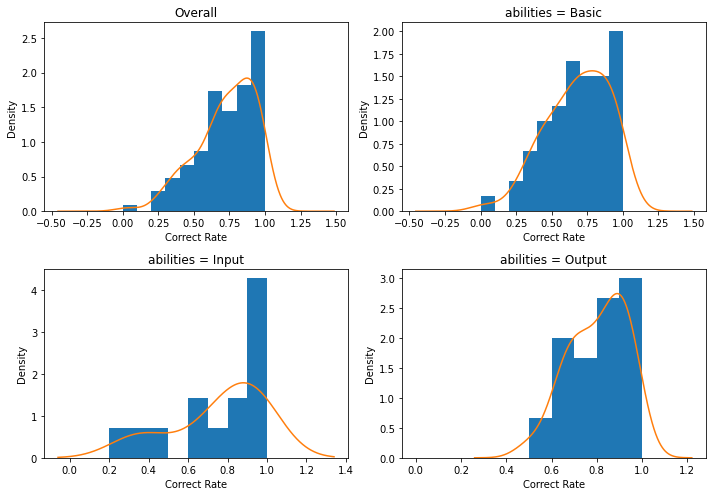

In [24]:
plt.figure(figsize=(10,7))

plt.subplot(221)
data[data.abilities != 0].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities != 0].correct_rate.plot(kind='kde')
plt.title('Overall')
plt.xlabel('Correct Rate')

plt.subplot(222)
data[data.abilities == 1].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities == 1].correct_rate.plot(kind='kde')
plt.title('abilities = Basic')
plt.xlabel('Correct Rate')

plt.subplot(223)
data[data.abilities == 2].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities == 2].correct_rate.plot(kind='kde')
plt.title('abilities = Input')
plt.xlabel('Correct Rate')

plt.subplot(224)
data[data.abilities == 4].correct_rate.plot(kind='hist', density=True, bins = 10, range = [0,1])
data[data.abilities == 4].correct_rate.plot(kind='kde')
plt.title('abilities = Output')
plt.xlabel('Correct Rate')

plt.tight_layout()

能力维度锚点题

In [73]:
ac_data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201201/18/33282160-自适应难度分析-能力维度主课-查询8.csv', encoding = 'gb18030')
ac_data.head()

,point2_id,is_correct,basic_exe_ratio,basic_exe_cr,input_exe_ratio,input_exe_cr,output_exe_ratio,output_exe_cr
0,6850742294182658311,0,0.7500,0.8462,NaN,NaN,0.2500,0.7692
1,6858848095845761293,0,0.6001,0.8801,NaN,NaN,0.3999,0.9155
2,6886258543930933512,1,0.6667,0.9877,0.3333,0.9877,NaN,NaN
3,6886217592298537223,1,1.0000,1.0000,NaN,NaN,NaN,NaN
4,6813933908099383560,0,1.0000,0.6036,NaN,NaN,NaN,NaN


In [76]:
correct = ac_data[ac_data.is_correct == 1].basic_exe_cr.dropna()
wrong = ac_data[ac_data.is_correct == 0].basic_exe_cr.dropna()
stats.ttest_ind(correct, wrong, equal_var = False).pvalue

7.085277322549155e-18

In [77]:
correct = ac_data[ac_data.is_correct == 1].input_exe_cr.dropna()
wrong = ac_data[ac_data.is_correct == 0].input_exe_cr.dropna()
stats.ttest_ind(correct, wrong, equal_var = False).pvalue

0.00040510551115629855

In [78]:
correct = ac_data[ac_data.is_correct == 1].output_exe_cr.dropna()
wrong = ac_data[ac_data.is_correct == 0].output_exe_cr.dropna()
stats.ttest_ind(correct, wrong, equal_var = False).pvalue

1.7355456678719763e-06

能力维度 掌握度波动

In [70]:
mst_data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201201/17/33282674-自适应看板-编辑框5-查询45.csv', encoding = 'gb18030')
mst_data.head()

,kp_id,abilities,is_correct,post_mst,pre_mst,ans_time
0,6811316293304598798,0,0,2102.0,2999.0,33
1,6811316268088459534,4,1,188271.0,177868.0,2024
2,6846162429945053453,1,1,330443.0,304189.0,3590
3,6811316319720390920,2,1,37740.0,28976.0,414
4,6839950969581666000,4,0,29020.0,31615.0,410
